# Capítulo 05 - Validação cruzada e reamostragem

## Exercícios aplicados

### Exercício 0X

In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from random import randint

from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

df_auto = pd.read_csv("../data/Auto.csv")

In [2]:
# Removendo os registros referentes aos registros em HP.
df_auto_w_hp = df_auto.loc[~df_auto["horsepower"].str.isnumeric(),:].copy()

df_auto_hp = df_auto.loc[df_auto["horsepower"].str.isnumeric(),:].copy()

df_auto_hp["horsepower"] = df_auto_hp["horsepower"].astype("float64")

# Testando train test splits e seu efeito no erro

## Alterando o test size

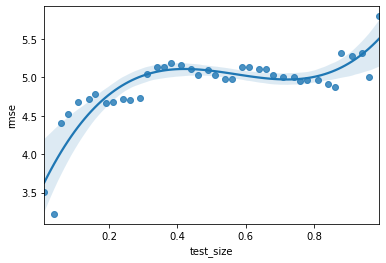

In [3]:
x_horsepower = df_auto_hp.loc[:, "horsepower"].values
y_mpg = df_auto_hp.loc[:, "mpg"].values

lst_test_size = np.arange(start=.01, stop=1, step=.025)

df_mse = []

for i, test_size in enumerate(lst_test_size):
    x_train, x_test, y_train, y_test = train_test_split(x_horsepower.reshape(-1, 1), y_mpg,
                                                        test_size=test_size, random_state=42)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = mean_squared_error(y_test, y_pred)**.5
    # print(f"{round(test_size, 2):.2f} -- {round(rmse,2):.2f}")
    df_mse.append([round(test_size, 2), rmse])
    
df_mse = pd.DataFrame(df_mse, columns=["test_size", "rmse"])

sns.regplot(x="test_size", y="rmse", data=df_mse, order=3);

## Diferentes reamostragens em diferentes test sizes

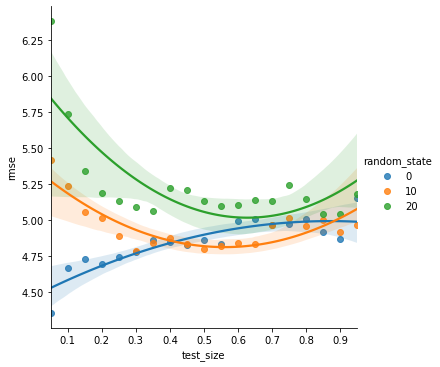

In [4]:
lst_test_size = np.arange(start=.05, stop=1, step=.05)

lst_random_state = np.arange(start=0, stop=21, step=10)

df_mse = []

for i, test_size in enumerate(lst_test_size):
    for random_state in lst_random_state:
        x_train, x_test, y_train, y_test = train_test_split(x_horsepower.reshape(-1, 1), y_mpg,
                                                            test_size=test_size, random_state=random_state)
        model = LinearRegression()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        rmse = mean_squared_error(y_test, y_pred)**.5
        # print(f"{round(test_size, 2):.2f} -- {round(rmse,2):.2f}")
        df_mse.append([round(test_size, 2), random_state, rmse])
#         print(random_state)
    
df_mse = pd.DataFrame(df_mse, columns=["test_size", "random_state", "rmse"])

sns.lmplot(x="test_size", y="rmse", hue="random_state", data=df_mse, order=2);

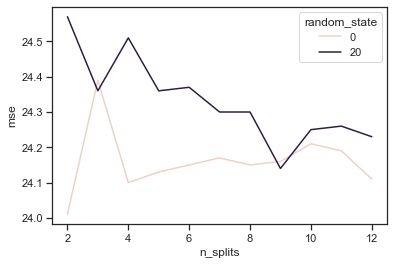

In [5]:
x_horsepower = df_auto_hp.loc[:, "horsepower"].values
y_mpg = df_auto_hp.loc[:, "mpg"].values

lst_n_splits = np.arange(start=2, stop=13, step=1)
lst_random_state = np.arange(start=0, stop=40, step=20)

df_mse = []

for i, n_splits in enumerate(lst_n_splits):
    for random_state in lst_random_state:
        model = LinearRegression()
        cv = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
        # print(f"{round(test_size, 2):.2f} -- {round(rmse,2):.2f}")
        scores = cross_val_score(model, X=x_horsepower.reshape(-1, 1), y=y_mpg, cv=cv, scoring="neg_mean_squared_error")
        df_mse.append([n_splits, round(abs(scores.mean()), 2), random_state])
    
df_mse = pd.DataFrame(df_mse, columns=["n_splits", "mse", "random_state"])

sns.set(style="ticks")
sns.set_palette("Paired")

sns.lineplot(x="n_splits", y="mse", hue="random_state", data=df_mse);

# Bootstrap


média: 104.47 desvio padrão: 38.44



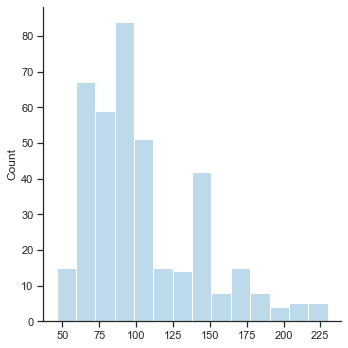

In [12]:
sns.displot(x_horsepower)

print(f"\nmédia: {round(x_horsepower.mean(),2)} desvio padrão: {round(x_horsepower.std(), 2)}\n")


Média: 94.22, Desvio Padrão: 33.86
Média: 98.54, Desvio Padrão: 34.6
Média: 100.22, Desvio Padrão: 36.1
Média: 99.89, Desvio Padrão: 35.33
Média: 101.94, Desvio Padrão: 36.84

média: 104.47 desvio padrão: 38.44



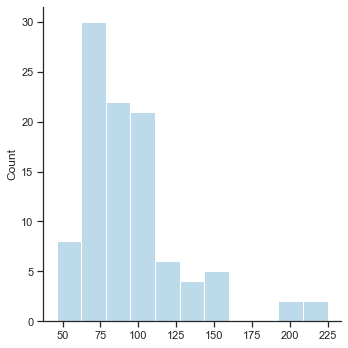

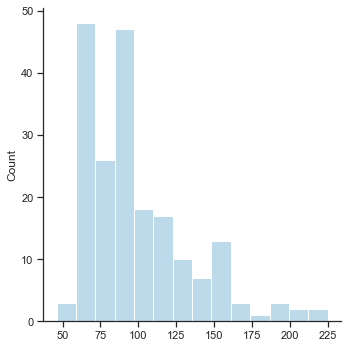

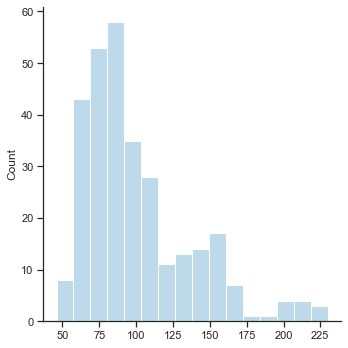

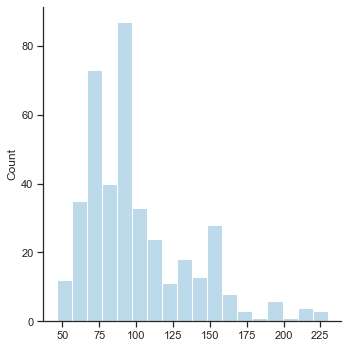

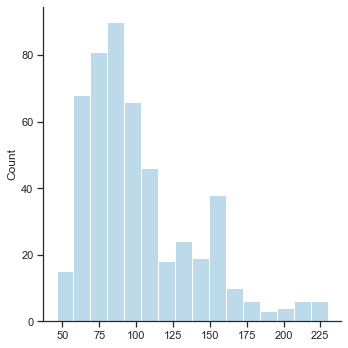

In [36]:
lst_idx = []

for j in range(5):
    for i in range(100):
        lst_idx.append(randint(0, len(x_horsepower)-1))
    print(f"Média: {round(x_horsepower[lst_idx].mean(), 2)}, Desvio Padrão: {round(x_horsepower[lst_idx].std(), 2)}")
    sns.displot(x_horsepower[lst_idx])

print(f"\nmédia: {round(x_horsepower.mean(),2)} desvio padrão: {round(x_horsepower.std(), 2)}\n")
# lst_idx = pd.DataFrame(lst_idx)
# lst_idx[0].value_counts()